In [ ]:
from scipy.datasets import ascent

# Load
ascent_image = ascent()

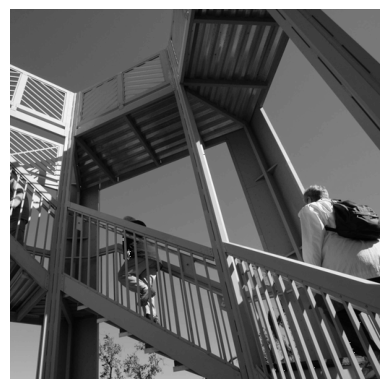

In [ ]:
import matplotlib.pyplot as plt

# Visualize the image
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

In [ ]:
import numpy as np

# Copy image to numpy array
image_transformed = np.copy(ascent_image)

# Get the dimensions of the image
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

In [ ]:
# Experiment with different values and see the effect
# filter = [
#     [0,1,0],
#     [1,-4,1],
#     [0,1,0]
# ]

# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]

filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

weight = 1

In [ ]:
# Iterate over the image
for x in range(1,size_x - 1):
  for y in range(1,size_y - 1):
    convolution = 0.0
    convolution = convolution + (ascent_image[x-1, y-1] * filter[0][0])
    convolution = convolution + (ascent_image[x-1, y] * filter[0][1])
    convolution = convolution + (ascent_image[x-1, y+1] * filter[0][2])
    convolution = convolution + (ascent_image[x, y-1] * filter[1][0])
    convolution = convolution + (ascent_image[x, y] * filter[1][1])
    convolution = convolution + (ascent_image[x, y+1] * filter[1][2])
    convolution = convolution + (ascent_image[x+1, y-1] * filter[2][0])
    convolution = convolution + (ascent_image[x+1, y] * filter[2][1])
    convolution = convolution + (ascent_image[x+1, y+1] * filter[2][2])

    # Multiply by weight
    convolution = convolution * weight

    # Check the boundaries of the pixel values
    if convolution < 0:
      convolution = 0
    if convolution > 255:
      convolution = 255

    # Load into the transformed image
    image_transformed[x,y] = convolution

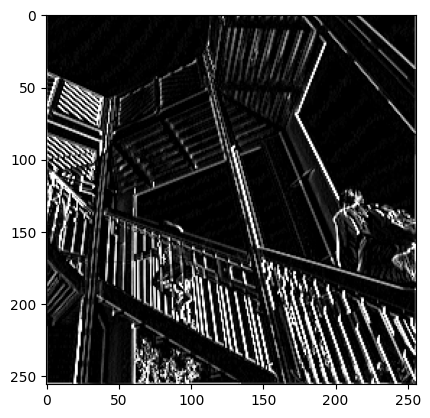

In [ ]:
# Assign dimensions half the size of the original image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create blank image with reduced dimensions
newImage = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0,size_x,2):
  for y in range(0,size_y,2):

    # Store all the pixel values in the (2,2) pool
    pixels = []
    pixels.append(image_transformed[x, y])
    pixels.append(image_transformed[x+1, y])
    pixels.append(image_transformed[x, y+1])
    pixels.append(image_transformed[x+1, y+1])

    # Get only largest value and assign to the reduced image
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- 256 instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()